## 📆 Week in Charts - 29/04/2022

### Imports and stylesheets

In [121]:
# Import matplotlib, fonts and stylesheet (optional)

import os
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

font_path = "../../assets/fonts"

for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
            except Exception:
                continue

plt.style.use("../../assets/mpl_styles/tukan_style.mplstyle")

In [122]:
from tukan_mkt.helpers import get_tukan_api_request
import pandas as pd
from highlight_text import ax_text, fig_text
from dateutil.relativedelta import relativedelta

### Chart 1. IGAE Time Series

In [123]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "economic_activity"
    ],
    "categories": {
        "economic_activity": [
            "8fd5b02b9f891fb",
            "dfeefc621d16d0c",
            "faa2a8d0af8a72c",
            "457155464609a2f"
        ],
        "adjustment_type": [
            "61060325ab095ed"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_igae",
            "variables": [
                "fa581e55c3b52cb"
            ]
        }
    ],
    "from": "2020-01-27"
}

df = get_tukan_api_request(payload=payload)["data"]

Success getting the data


In [124]:
# Hacemos enero 2020 base 100

aux_df = df[df["date"] == "2020-01-01"].reset_index(drop = True)
aux_df.rename(columns = {"fa581e55c3b52cb":"base"}, inplace = True)

df = pd.merge(df, aux_df[["economic_activity__ref", "base"]], on = "economic_activity__ref", how = "left")

In [125]:
df.tail(10)

,date,economic_activity__ref,economic_activity,fa581e55c3b52cb,base
94,2021-12-01,dfeefc621d16d0c,Actividad económica,109.357824,113.306536
95,2021-12-01,faa2a8d0af8a72c,Industrias manufactureras,115.131402,114.150575
96,2022-01-01,457155464609a2f,Construcción,87.839067,98.206623
97,2022-01-01,8fd5b02b9f891fb,Actividades terciarias,114.464117,119.197541
98,2022-01-01,dfeefc621d16d0c,Actividad económica,109.842940,113.306536
99,2022-01-01,faa2a8d0af8a72c,Industrias manufactureras,115.451060,114.150575
100,2022-02-01,457155464609a2f,Construcción,86.488022,98.206623
101,2022-02-01,8fd5b02b9f891fb,Actividades terciarias,115.170413,119.197541
102,2022-02-01,dfeefc621d16d0c,Actividad económica,109.848532,113.306536
103,2022-02-01,faa2a8d0af8a72c,Industrias manufactureras,116.118495,114.150575


In [126]:
df["fa581e55c3b52cb"] = [(x/y)*100 for x,y in zip(df["fa581e55c3b52cb"], df["base"])]
df.replace({
   "economic_activity":{
      "Actividad económica":"Índice general",
      "Actividades terciarias": "Servicios",
      "Industrias manufactureras": "Manufactura"
   }
}, inplace = True)

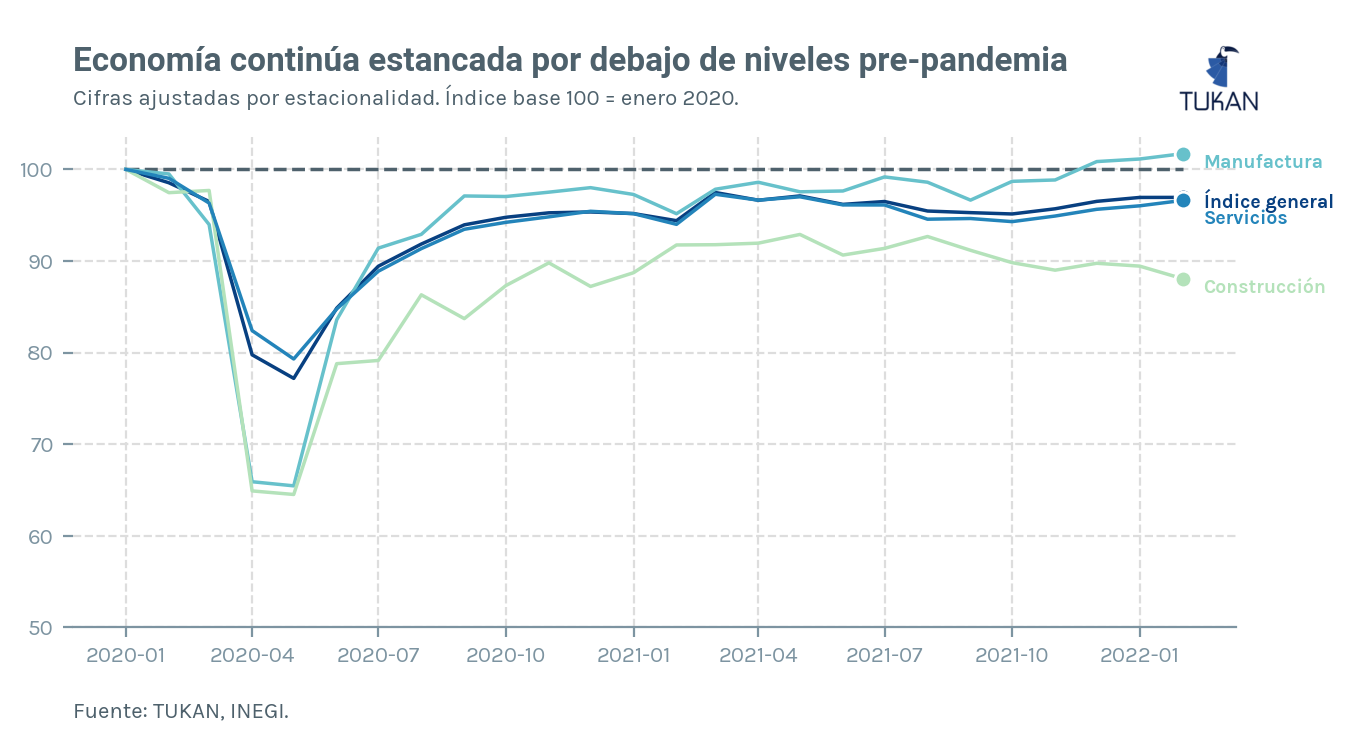

In [127]:
fig = plt.figure(dpi = 200)
ax = plt.subplot(111)

X_min = df["date"].min()
X_max = df["date"].max()
for ea in ["Índice general", "Manufactura", "Construcción", "Servicios"]:
   plot_df = df[df["economic_activity"] == ea]
   line_ = ax.plot(plot_df["date"], plot_df["fa581e55c3b52cb"], marker = "o", markevery = [-1], ms = 6, mec = "white", zorder = 3)
   Y_end = plot_df["fa581e55c3b52cb"].iloc[-1]

   if ea == "Servicios":
      Y_end = Y_end - 1
   if ea == "Índice general":
      Y_end = Y_end + 1

   ax_text(x=X_max + relativedelta(days=15), y = Y_end,
            s=f"<{ea}>",
            highlight_textprops=[{"color": line_[0].get_color()}],
            ax=ax, weight="bold", ha="left", size = 7)

ax.plot([X_min,X_max],[100,100], color = "#4E616C", ls = "--", zorder = 2)
ax.set_ylim(50)
# ----- Title and subtitle

fig_text(x = 0.125, y = 1.02, 
         s = "Economía continúa estancada por debajo de niveles pre-pandemia",
         family = "Roboto",
         weight = "bold",
         fontsize = 12)

fig_text(x = 0.125, y = .96, 
         s = "Cifras ajustadas por estacionalidad. Índice base 100 = enero 2020.",
         family = "Karla",
         fontsize = 8)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.8, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig_text(x = 0.125, y = .01, 
         s = "Fuente: TUKAN, INEGI.",
         family = "Karla",
         fontsize = 8)

plt.savefig(
   "plots/igae.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/igae_white.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Chart 2. ✈ International Passengers

In [128]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "flight_type",
        "origin_iata"
    ],
    "categories": {
        "origin_iata": [
            "b29d2f2066eb721"
        ],
        "flight_type": [
            "35cb19fdd2304ab"
        ]
    },
    "request": [
        {
            "table": "mex_sct_flight_origin_destination",
            "variables": [
                "09cfa4ae6c049cd"
            ]
        }
    ],
    "from": "2010-01-28"
}

df_ori = get_tukan_api_request(payload=payload)["data"]

Success getting the data


In [129]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "flight_type",
        "destination_iata"
    ],
    "categories": {
        "destination_iata": [
            "b29d2f2066eb721"
        ],
        "flight_type": [
            "35cb19fdd2304ab"
        ]
    },
    "request": [
        {
            "table": "mex_sct_flight_origin_destination",
            "variables": [
                "09cfa4ae6c049cd"
            ]
        }
    ],
    "from": "2010-01-28"
}

df_dest = get_tukan_api_request(payload=payload)["data"]

Success getting the data


In [130]:
df = pd.concat([
   df_ori.groupby(["date"]).sum().reset_index(),
   df_dest.groupby(["date"]).sum().reset_index()]
)

df = df.groupby(["date"]).sum().reset_index()

In [131]:
1756826.0/1579671.0-1

0.11214676980206639

In [132]:
df[df["09cfa4ae6c049cd"] == 1579671.0]

,date,09cfa4ae6c049cd
98,2018-03-01,1579671.0


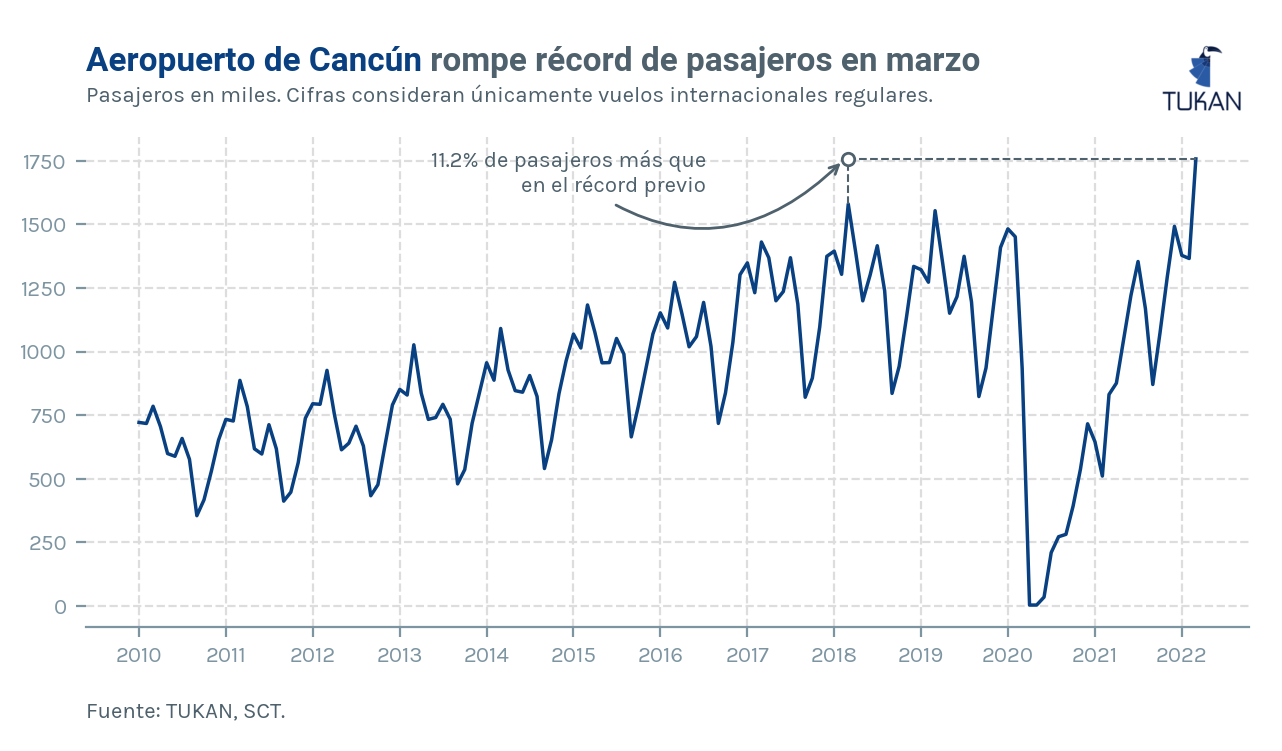

In [133]:
fig = plt.figure(dpi = 200)
ax = plt.subplot(111)

# --- Get minimum and maximum axis positions.

X_min = df["date"].min()
X_max = df["date"].max()

Y_max = df["09cfa4ae6c049cd"].max()/1000
prev_max = df[df["09cfa4ae6c049cd"] == 1579671.0]["date"].iloc[0]

ax.plot(df["date"], df["09cfa4ae6c049cd"]/1000)
ax.plot([prev_max, X_max], [Y_max, Y_max], ls = "--", color = "#4E616C", lw = 0.75)
ax.plot([prev_max, prev_max], [1579671/1000, Y_max], ls = "--", color = "#4E616C", lw = 0.75)
ax.scatter([prev_max],[Y_max], s = 20, ec = "#4E616C", fc ="white", zorder = 3)
ax.xaxis.set_major_locator(mdates.YearLocator(1))

ax.annotate(
   text = "11.2% de pasajeros más que\nen el récord previo",
   xy = (prev_max - relativedelta(days = 15), Y_max),
   xytext = (-50,-5),
   textcoords="offset points",
   size = 8,
   va="center",
   ha="right",
   family = "Karla",
   arrowprops=dict(
        arrowstyle="->", ec="#4E616C", connectionstyle="arc3,rad=.45"
   )
)


fig_text(x = 0.125, y = 1.02, 
         s = "<Aeropuerto de Cancún> rompe récord de pasajeros en marzo",
         highlight_textprops=[{"color": "#084081"}],
         family = "Roboto",
         weight = "bold",
         fontsize = 12)

fig_text(x = 0.125, y = .96, 
         s = "Pasajeros en miles. Cifras consideran únicamente vuelos internacionales regulares.",
         family = "Karla",
         fontsize = 8)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.78, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig_text(x = 0.125, y = .01, 
         s = "Fuente: TUKAN, SCT.",
         family = "Karla",
         fontsize = 8)

plt.savefig(
   "plots/cancun.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/cancun_white.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### Chart 3. Pension Funds

In [134]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "institutions",
        "investments",
        "mex_consar_siefore",
        "nationality_status"
    ],
    "categories": {
        "institutions": [
            "8e2a795df927a38"
        ],
        "investments": [
            "f73aad2bb7314bd"
        ],
        "mex_consar_siefore": "all",
        "nationality_status": "all"
    },
    "request": [
        {
            "table": "mex_consar_siefore_investments",
            "variables": [
                "49fe30780fa6b49"
            ]
        }
    ],
    "from": "2000-01-28"
}

df = get_tukan_api_request(payload)["data"]

Success getting the data


In [135]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "mex_consar_siefore"
    ],
    "categories": {
        "mex_consar_siefore": "all",
        "institutions": [
            "8e2a795df927a38"
        ]
    },
    "request": [
        {
            "table": "mex_consar_siefore_balance_sheet",
            "variables": [
                "853e2f1fb9712bb"
            ]
        }
    ],
    "from": "2000-01-28"
}

df_2 = get_tukan_api_request(payload)["data"]

Success getting the data


In [136]:
df = df.pivot(columns=["nationality_status"], values = ["49fe30780fa6b49"], index = ["mex_consar_siefore__ref", "date"]).reset_index()

In [137]:
df = df.droplevel(0, axis = 1)
df.columns = ["mex_consar_siefore__ref", "date", "foreign", "national"]
df.reset_index(drop = True, inplace = True)
df

,mex_consar_siefore__ref,date,foreign,national
0,0578ddb92e0731e,2008-03-01,0.001,0.011
1,0578ddb92e0731e,2008-04-01,0.005,0.018
2,0578ddb92e0731e,2008-05-01,0.002,0.011
3,0578ddb92e0731e,2008-06-01,0.002,0.024
4,0578ddb92e0731e,2008-07-01,0.008,0.059
...,...,...,...,...
1112,f88f66d176e4b2a,2012-06-01,0.154,0.097
1113,f88f66d176e4b2a,2012-07-01,0.158,0.098
1114,f88f66d176e4b2a,2012-08-01,0.162,0.098
1115,f88f66d176e4b2a,2012-09-01,0.165,0.105


In [138]:
df = pd.merge(df, df_2, how = "left", on = ["date", "mex_consar_siefore__ref"])

In [139]:
df = df[df["mex_consar_siefore__ref"] != "0578ddb92e0731e"].reset_index(drop = True)
df["mex_consar_siefore"].fillna("Siefore básica 65-69", inplace = True)
df["853e2f1fb9712bb"].fillna(715636577989.59, inplace = True)

In [140]:
df["foreign"] = df["foreign"]*df["853e2f1fb9712bb"]
df["national"] = df["national"]*df["853e2f1fb9712bb"]

df = df[["date", "foreign", "national", "853e2f1fb9712bb"]].groupby(["date"]).sum().reset_index()

In [141]:
df["foreign_mkt"] = df["foreign"]/df["853e2f1fb9712bb"]
df["national_mkt"] = df["national"]/df["853e2f1fb9712bb"]

In [145]:
df.tail(20)

,date,foreign,national,853e2f1fb9712bb,foreign_mkt,national_mkt
149,2020-08-01,5.400255e+11,1.965530e+11,4.133298e+12,0.130652,0.047554
150,2020-09-01,5.448668e+11,1.987428e+11,4.168717e+12,0.130704,0.047675
151,2020-10-01,5.210210e+11,2.035871e+11,4.146968e+12,0.125639,0.049093
152,2020-11-01,5.676104e+11,2.233941e+11,4.241978e+12,0.133808,0.052663
153,2020-12-01,5.805765e+11,2.387594e+11,4.400566e+12,0.131932,0.054257
154,2021-01-01,5.999617e+11,2.352075e+11,4.462014e+12,0.134460,0.052713
155,2021-02-01,6.294503e+11,2.390404e+11,4.485863e+12,0.140319,0.053287
156,2021-03-01,6.182178e+11,2.540594e+11,4.392125e+12,0.140756,0.057844
157,2021-04-01,6.466932e+11,2.563360e+11,4.434408e+12,0.145835,0.057806
158,2021-05-01,6.388149e+11,2.638981e+11,4.510538e+12,0.141627,0.058507


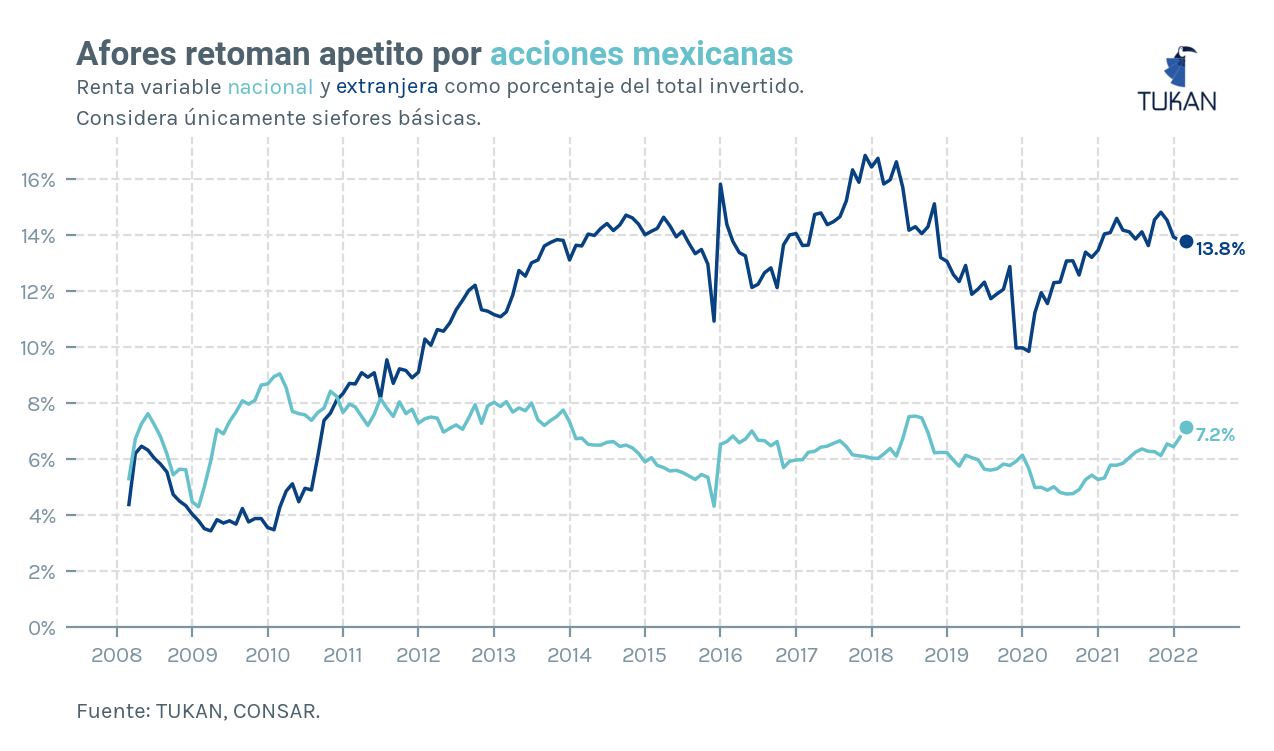

In [115]:
fig = plt.figure(dpi = 200)
ax = plt.subplot(111)

X_min = df["date"].min()
X_max = df["date"].max()


foreign_ = ax.plot(df["date"], df["foreign_mkt"], marker = "o", markevery = [-1], ms = 6, mec = "white", zorder = 3)
national_ = ax.plot(df["date"], df["national_mkt"], marker = "o", markevery = [-1], ms = 6, mec = "white", zorder = 3)

ax.yaxis.set_major_formatter("{x:,.0%}")
ax.xaxis.set_major_locator(mdates.YearLocator(1))

f_color = foreign_[0].get_color()
n_color = national_[0].get_color()


f_end = df["foreign_mkt"].iloc[-1]
n_end = df["national_mkt"].iloc[-1]

ax_text(x=X_max + relativedelta(days=45), y = f_end,
         s=f"<{f_end:,.1%}>",
         highlight_textprops=[{"color": f_color}],
         ax=ax, weight="bold", ha="left", size = 7)

ax_text(x=X_max + relativedelta(days=45), y = n_end,
         s=f"<{n_end:,.1%}>",
         highlight_textprops=[{"color": n_color}],
         ax=ax, weight="bold", ha="left", size = 7)


# ----- Title and subtitle

fig_text(x = 0.125, y = 1.03, 
         s = "Afores retoman apetito por <acciones mexicanas>",
         highlight_textprops=[{"color": n_color}],
         family = "Roboto",
         weight = "bold",
         fontsize = 12)

fig_text(x = 0.125, y = .97, 
         s = "Renta variable <nacional> y <extranjera> como porcentaje del total invertido.\nConsidera únicamente siefores básicas.",
         highlight_textprops=[{"color": n_color},{"color": f_color}],
         family = "Karla",
         fontsize = 8)

fig_text(x = 0.125, y = .01, 
         s = "Fuente: TUKAN, CONSAR.",
         family = "Karla",
         fontsize = 8)

ax.set_ylim(0)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.77, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
   "plots/afores_rv.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/afores_rv_white.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)